In [15]:
import sys
sys.path.append('/home/painchess/projects_clean/Simulations')
sys.path.append('/home/painchess/projects_clean/Halo_Analytical_Calculations')
from simulation import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pickle


In [16]:
params = {'legend.fontsize': 9,
          'legend.handlelength': 2}
plt.rcParams["figure.dpi"]= 150
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(params)

In [20]:
sim_names = ['M25S07', 'M25S08', 'M25S09', 'M03S07', 'M03S08', 'M03S09', 'M35S07', 'M35S08', 'M35S09',
                 'Illustris', 'BolshoiP', 'Bolshoi', 'M03S08b', 'm25s85', 'm2s8', 'm4s7', 'm4s8', 'm2s9',
                 'm3s8_50', 'm3s8', 'm35s75', 'm4s9', 'm3s9', 'm25s75', 'm2s1', 'm3s7', 'm3s85', 'm2s7', 'm25s8',
                 'm35s8', 'm25s9', 'm35s85', 'm3s75', 'm35s9', 'm35s7']
omegas = [0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.35, 0.309, 0.307, 0.27, 0.3, 0.25, 0.2, 0.4, 0.4, 0.2, 0.3
    , 0.3, 0.35, 0.4, 0.3, 0.25, 0.2, 0.3, 0.3, 0.2, 0.25, 0.35, 0.25, 0.35, 0.3, 0.35, 0.35]
sigmas = [0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.816, 0.82, 0.82, 0.8, 0.85, 0.8, 0.7, 0.8, 0.9, 0.8
    , 0.8, 0.75, 0.9, 0.9, 0.75, 1.0, 0.7, 0.85, 0.7, 0.8, 0.8, 0.9, 0.85, 0.75, 0.9, 0.7]

sims = dict(zip(sim_names, list(zip(omegas, sigmas))))

path = '/home/painchess/sims/'
oldpath = '/home/painchess/disq2/ahf-v1.0-101/'
disqpath = '/home/painchess/YubaHDD6T/oldsims/'

# One simulation

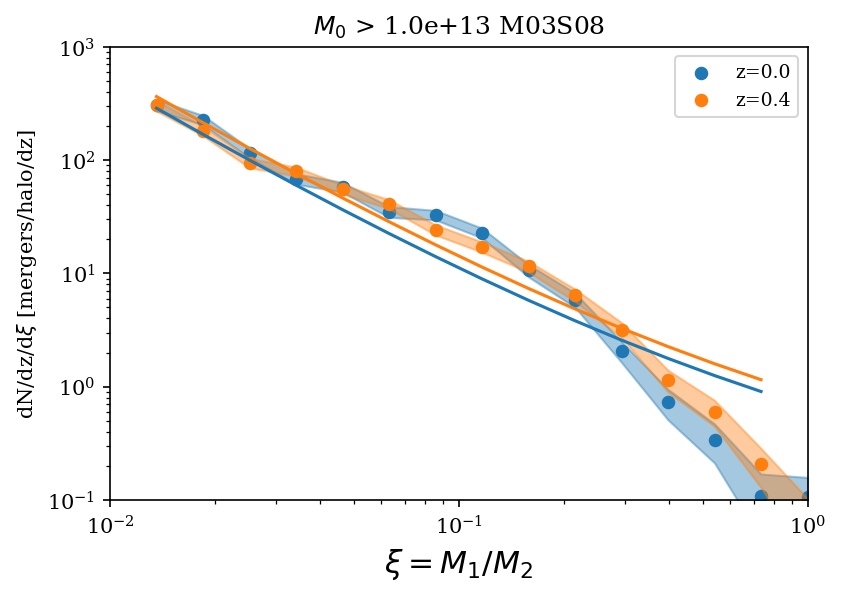

In [19]:
sim = 'M03S08'
sim1 = Simulation(sim, sims[sim][0], sims[sim][1], path)
reds = sim1.get_redshifts()

snapshots = [1,   8]
mlim, bins, ximin, ximax = 1e13, 15, 1e-2, 1
xis = np.logspace(np.log10(ximin), np.log10(ximax), bins + 1)
dxis = xis[1:] - xis[:-1]

for i in range(len(snapshots)):
    snap = snapshots[i]
    nmgs, tds = sim1.dndxi(snap, mlim, bins, ximin, ximax, wpos=False)
    dz = reds[snap + 1] - reds[snap]
    y = nmgs / dz / dxis / tds[1:]
    poisson = np.sqrt(nmgs) / dz / tds[1:] / dxis

    plt.plot(xis[1:-1], ell_mrate_per_n(3 * mlim, reds[snap], xis, om0=sim1.om0, sig8=sim1.sig8), '-',
             color='C{}'.format(i), linewidth=1.5)
    plt.scatter(xis[1:], y, color='C{}'.format(i), s=30, label='z={:1.1f}'.format(reds[snap]))

    plt.fill_between(xis[1:], y - poisson, y + poisson, color='C{}'.format(i), alpha=0.4)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\xi =M_1/M_2$', size=15)
plt.ylabel(r'dN/dz/d$\xi$ [mergers/halo/dz]')
plt.ylim(1e-1, 1e3)
plt.xlim(ximin, ximax)
plt.title(r'$M_0$ > {:2.1e} {}'.format(mlim, sim))
plt.legend()
plt.show()


## Merger rates for all simulations

/tmp/ipykernel_26370/3295127076.py:29: RuntimeWarning: divide by zero encountered in divide
  ps = np.sqrt(1/nmgs + 1/tnds[:-1])*nmgs/tnds[:-1]
/tmp/ipykernel_26370/3295127076.py:29: RuntimeWarning: invalid value encountered in multiply
  ps = np.sqrt(1/nmgs + 1/tnds[:-1])*nmgs/tnds[:-1]
/tmp/ipykernel_26370/3295127076.py:29: RuntimeWarning: divide by zero encountered in divide
  ps = np.sqrt(1/nmgs + 1/tnds[:-1])*nmgs/tnds[:-1]
/tmp/ipykernel_26370/3295127076.py:29: RuntimeWarning: invalid value encountered in multiply
  ps = np.sqrt(1/nmgs + 1/tnds[:-1])*nmgs/tnds[:-1]


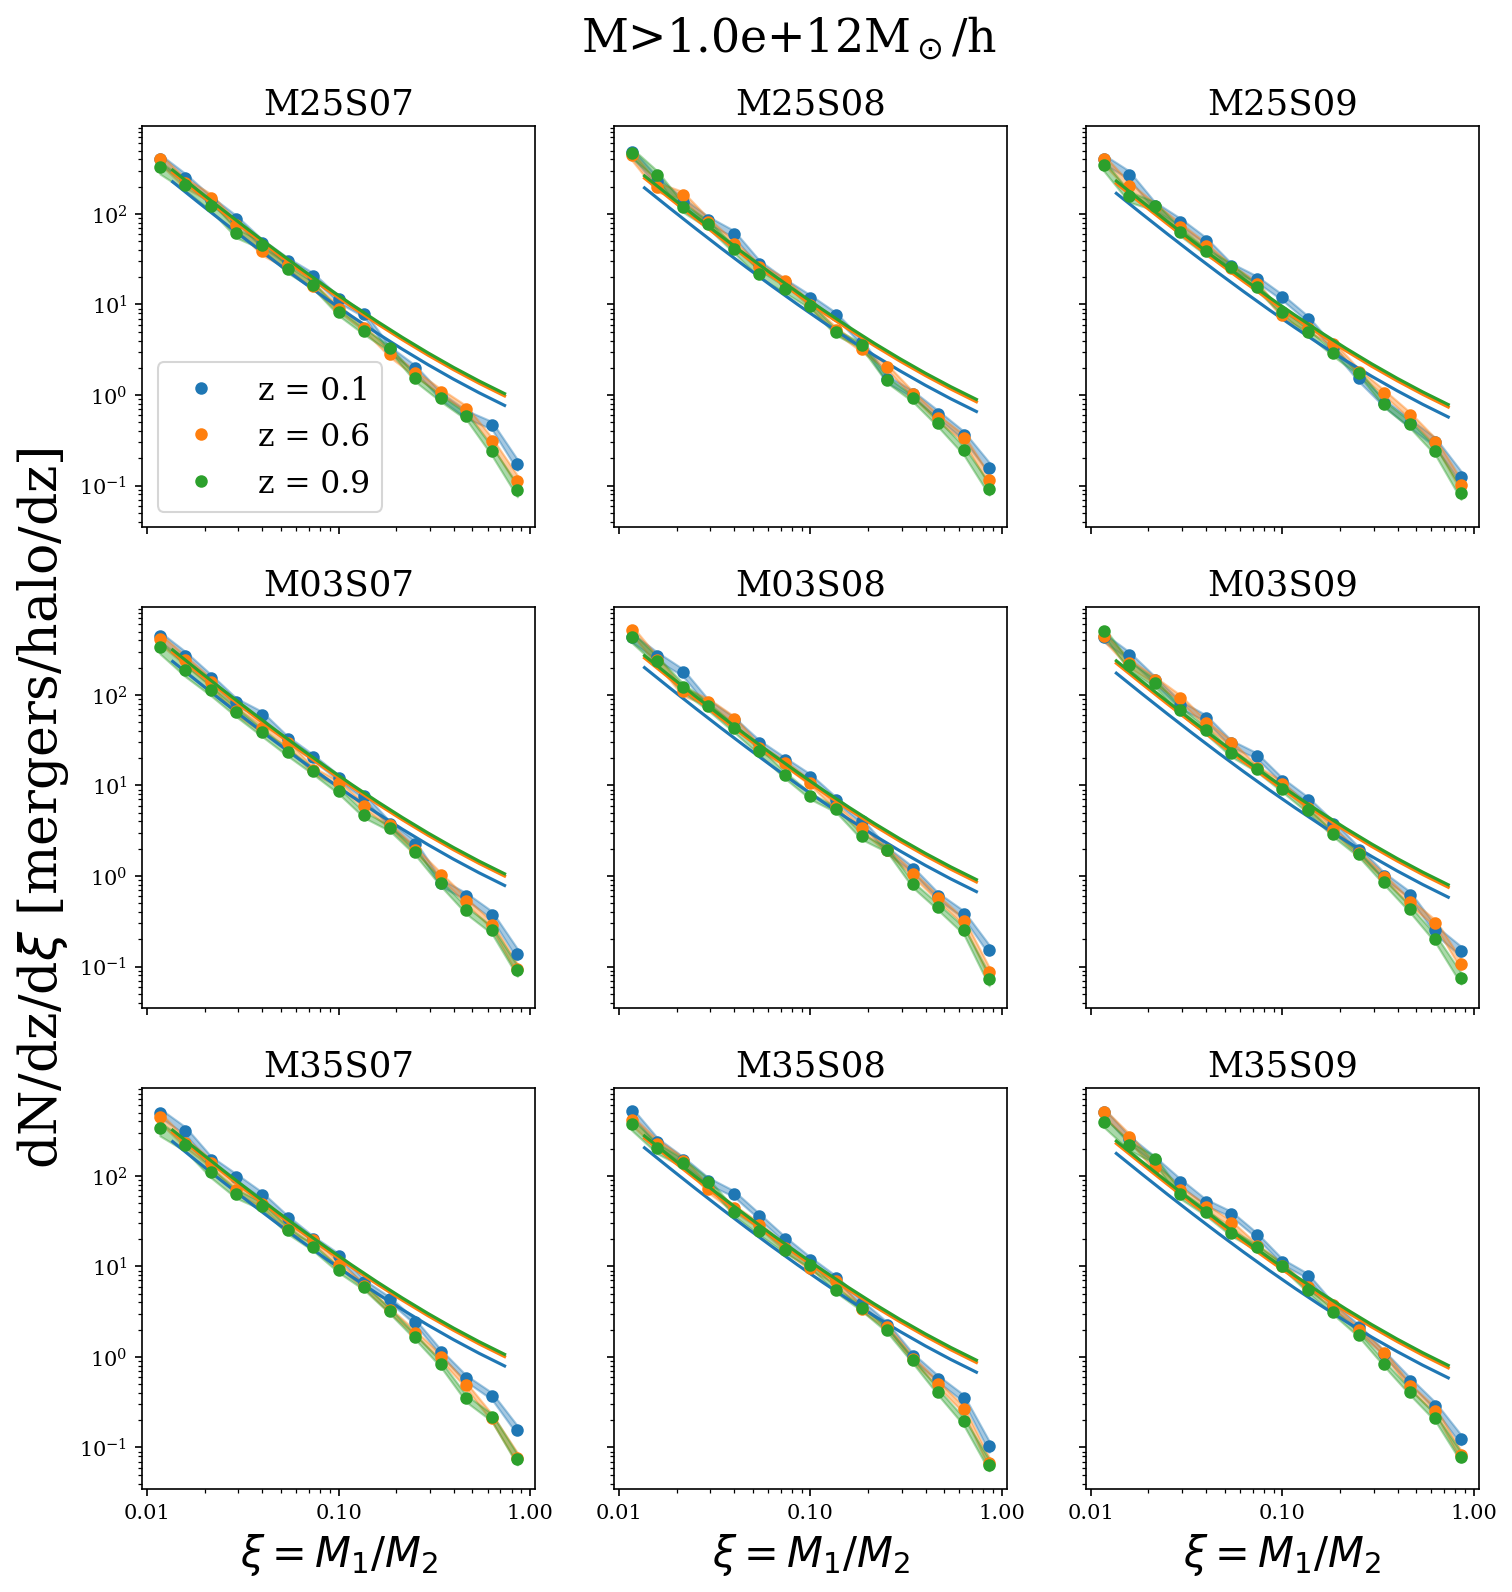

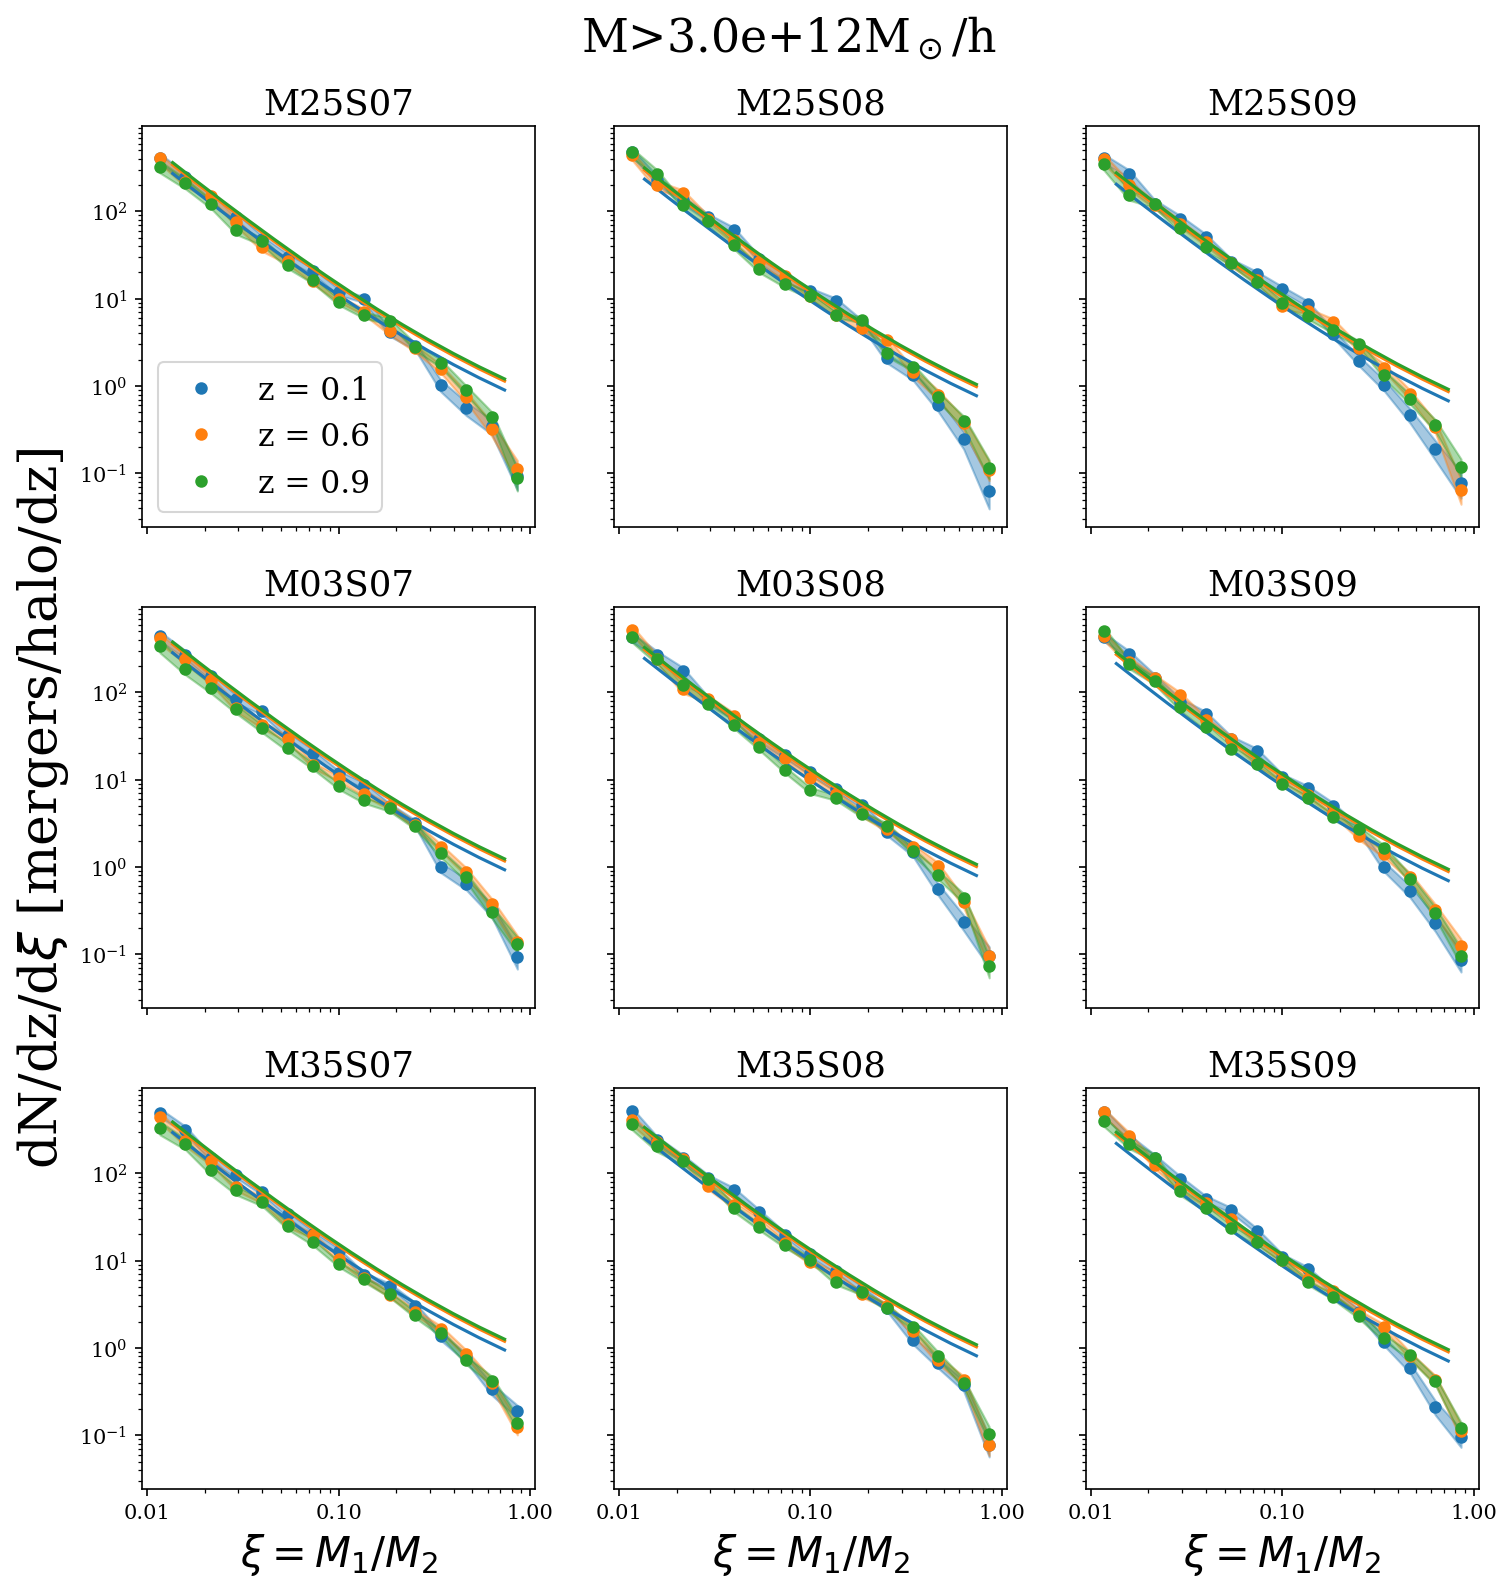

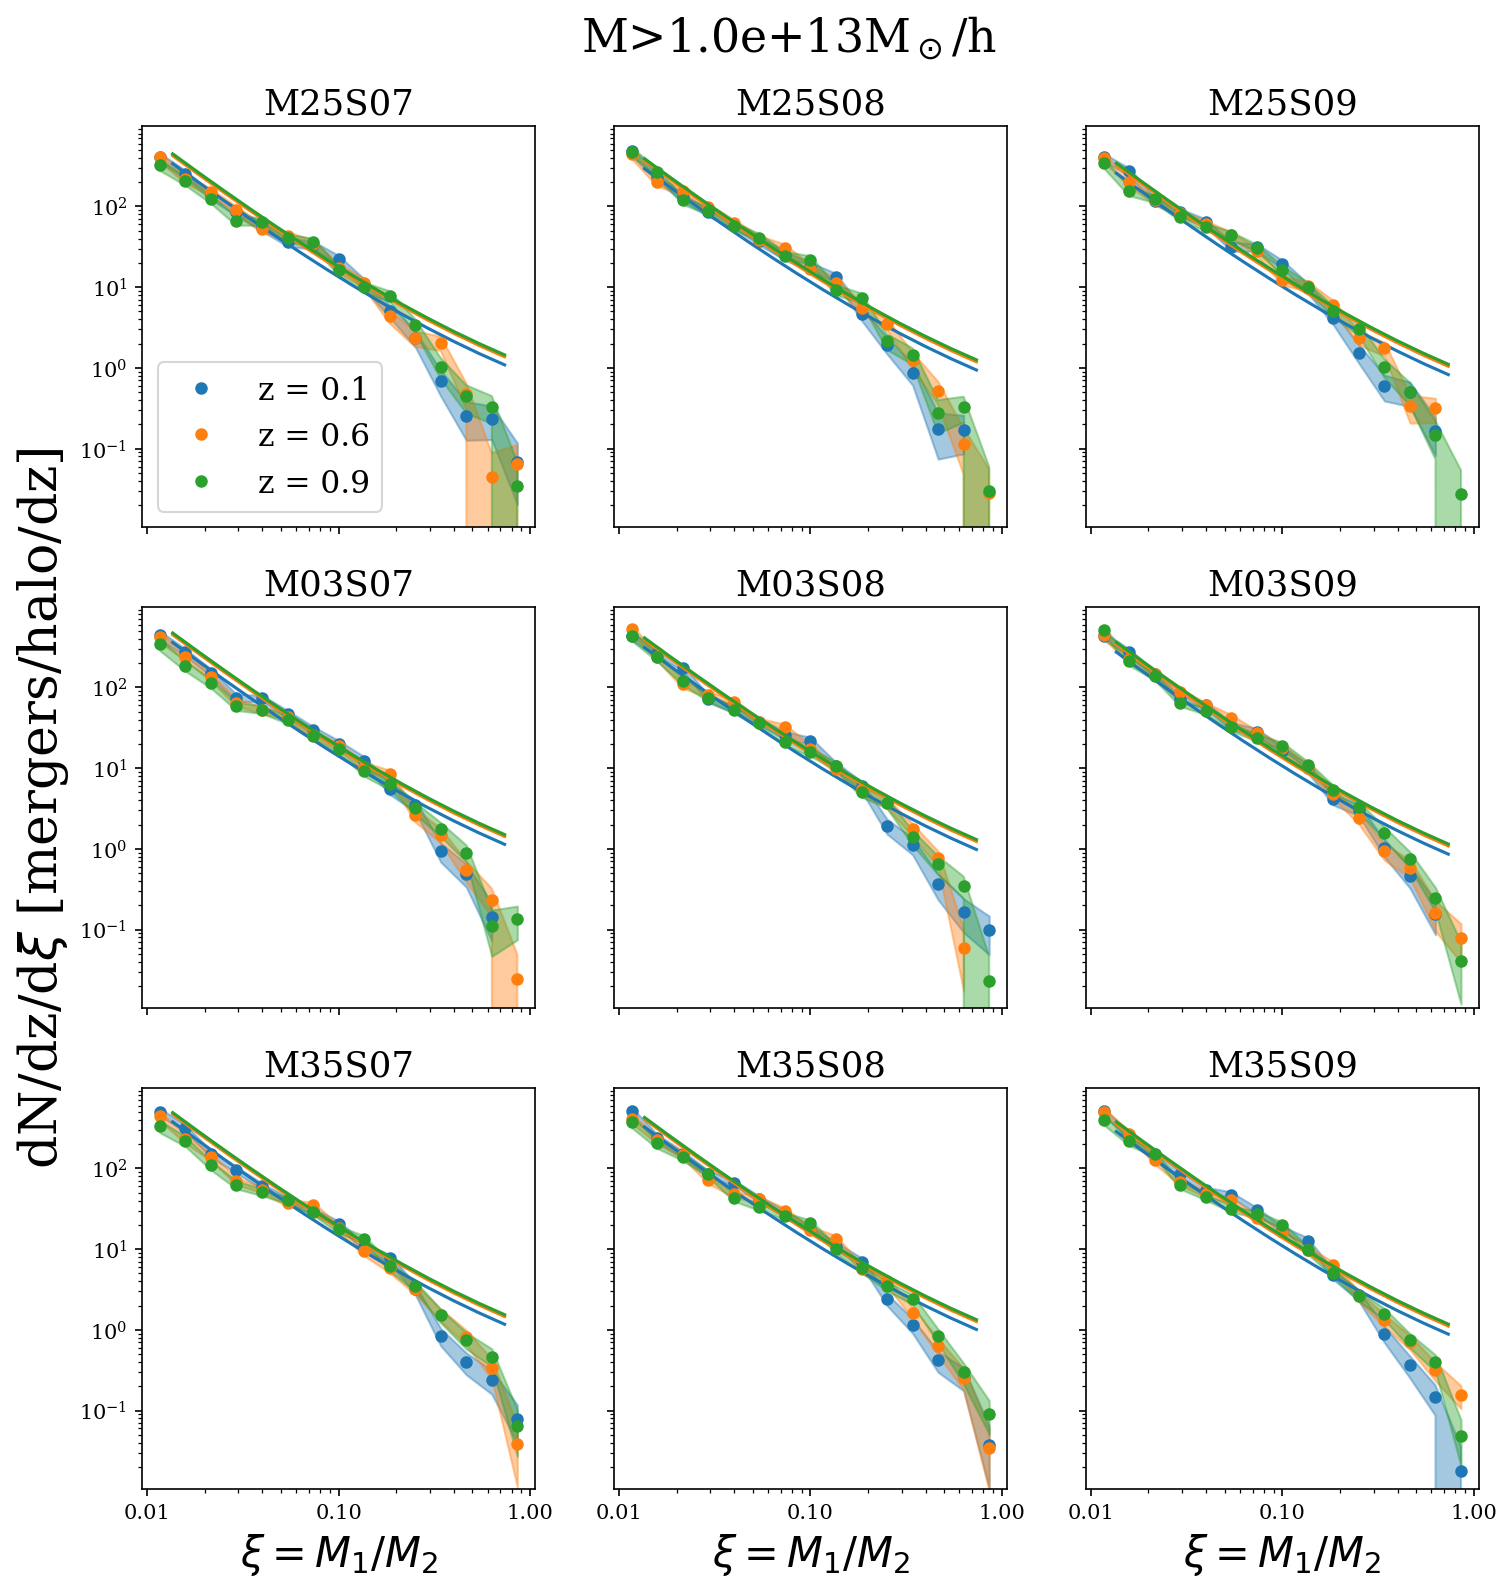

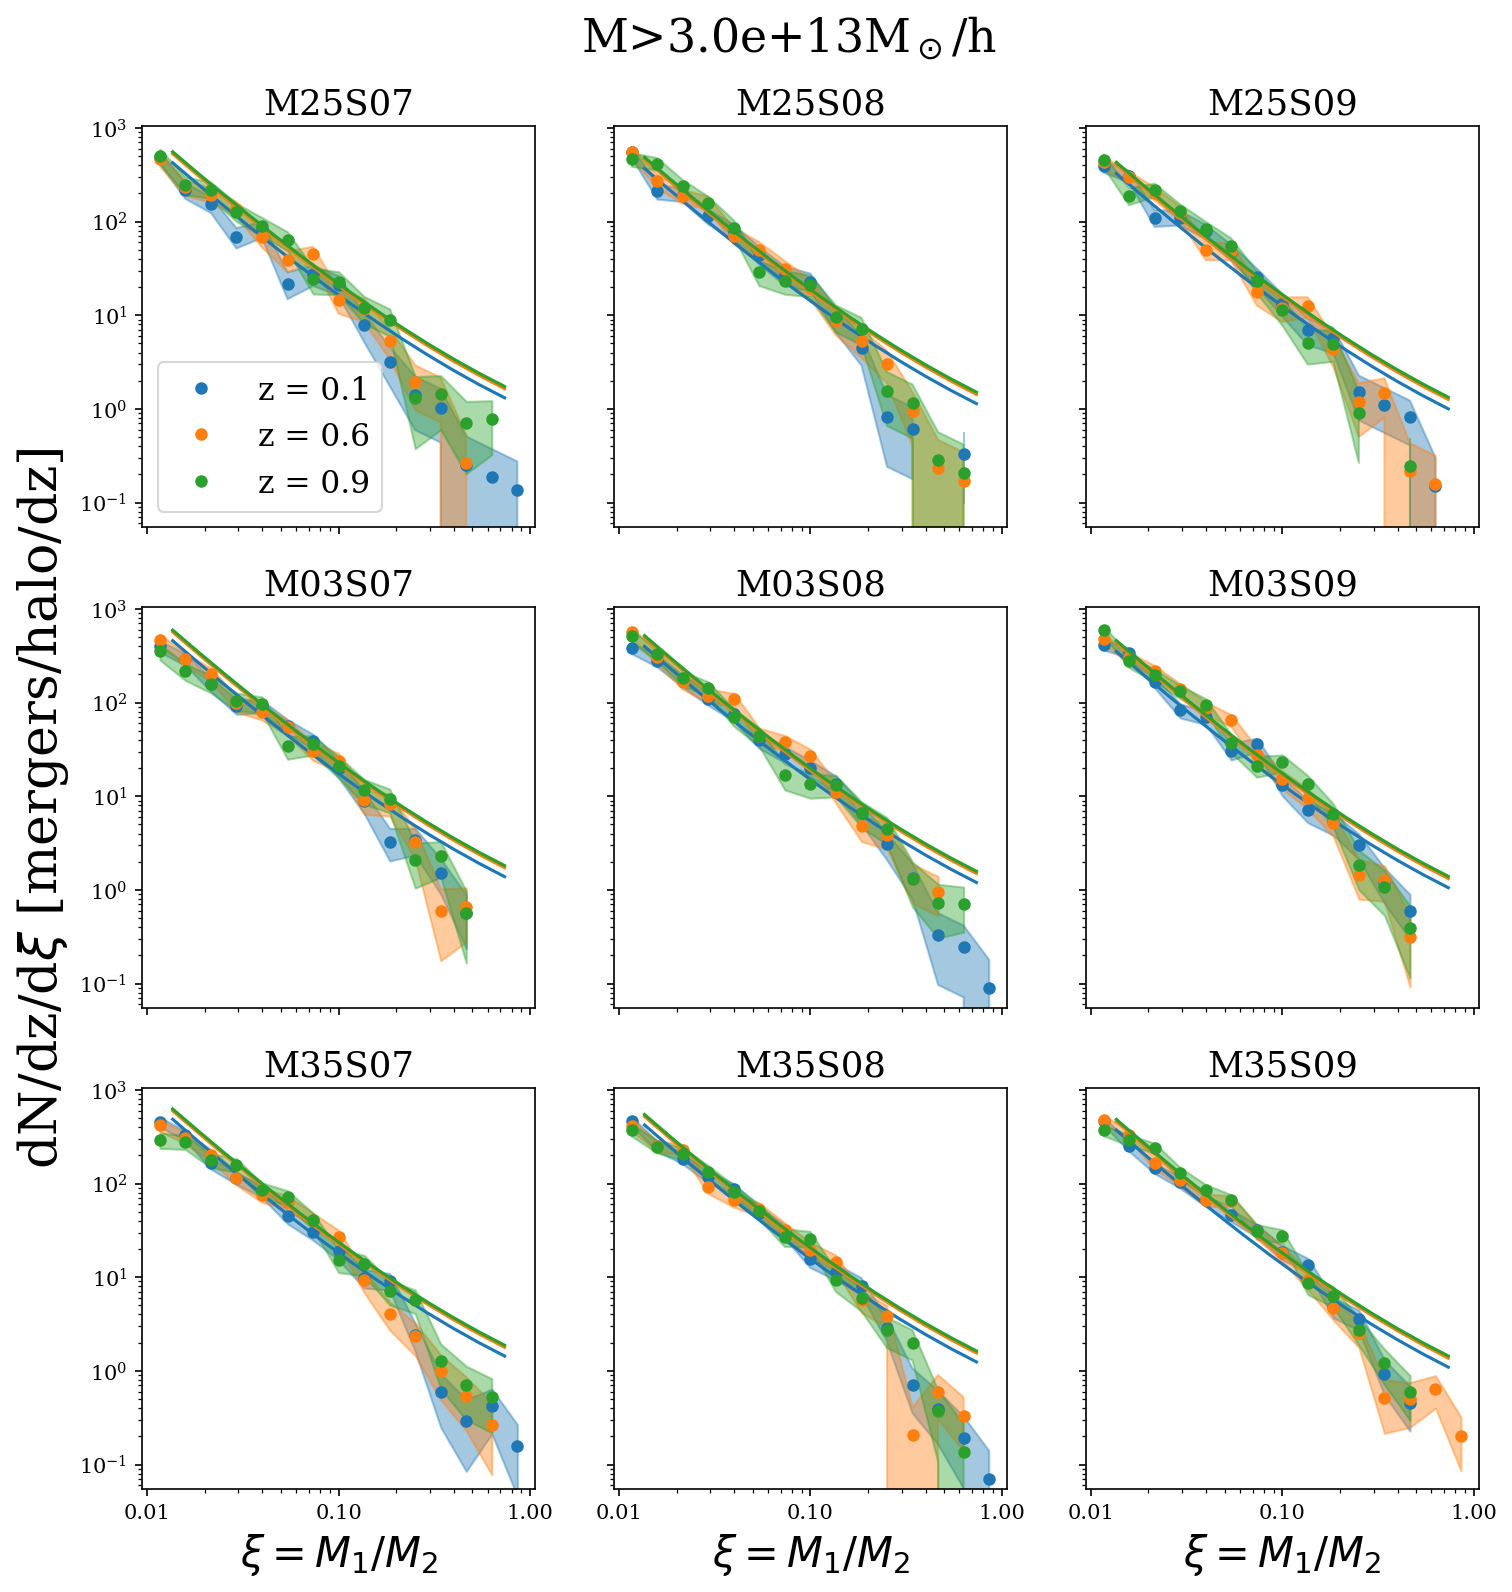

In [34]:
sim_selec = np.arange(9)

ximin, ximax, resol = 1e-2, 1, 15
xis = np.logspace(np.log10(ximin), np.log10(ximax), resol+1)
dxis, ximeans = xis[1:]-xis[:-1], np.sqrt(xis[1:]*xis[:-1])

mlims = [1e12, 3e12, 1e13, 3e13]
sel_reds = np.array([0.05, 0.55, 0.8])
for k in range(len(mlims)):
    fig, axs = plt.subplots(3,3, sharex=True, sharey=True, figsize=[11.5,11.5])

    mlim = mlims[k]
    for i in range(len(sim_selec)):
        ax = axs[i // 3, i % 3]
        sim = sim_names[i]
        sim1 = Simulation(sim, sims[sim][0], sims[sim][1], path)
           
        reds = sim1.get_redshifts()
        for j in range(len(sel_reds)):
            snap = np.min(np.where(reds >= sel_reds[j]))
            dz = reds[snap +1]-reds[snap]

            nmgs, tnds = sim1.dndxi(snap, mlim, bins=resol, wpos=False)
            y = nmgs/dz/dxis/tnds[:-1]
            ps = np.sqrt(1/nmgs + 1/tnds[:-1])*nmgs/tnds[:-1]
            tps = ps/dz/dxis
            ax.plot(ximeans,  y, 'o', ms=5,  color='C{}'.format(j),
                     label=r'z = {:1.1f}'.format(reds[snap]))
            ax.fill_between(ximeans, y-tps, y+tps,  color='C{}'.format(j), alpha=0.4)
            ax.plot(xis[1:-1], ell_mrate_per_n(3*mlim, reds[snap], xis, om0=sim1.om0, sig8=sim1.sig8), color='C{}'.format(j),
              linewidth=1.5)
        ax.set_title(sim, size=17)
        if i==0:
            ax.legend(fontsize=15)
        if i//3 == 2:
            ax.set_xlabel(r'$\xi =M_1/M_2$', size=20)

        if i == 3:
            ax.set_ylabel(r'dN/dz/d$\xi$ [mergers/halo/dz]', size=25)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax = plt.gca()
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    fig.suptitle('M>{:1.1e}M$_\odot$/h'.format(mlim), size=22)
    plt.subplots_adjust(top=0.915)
    plt.savefig('./figs/dN_dxi_{:1.1e}.png'.format(mlim), dpi=300, facecolor='white', transparent=False, bbox_inches='tight')
    plt.savefig('./figs/dN_dxi_{:1.1e}.pdf'.format(mlim), dpi=300, facecolor='white', transparent=False, bbox_inches='tight')
    
plt.show()

# Merger rates vs cosmology

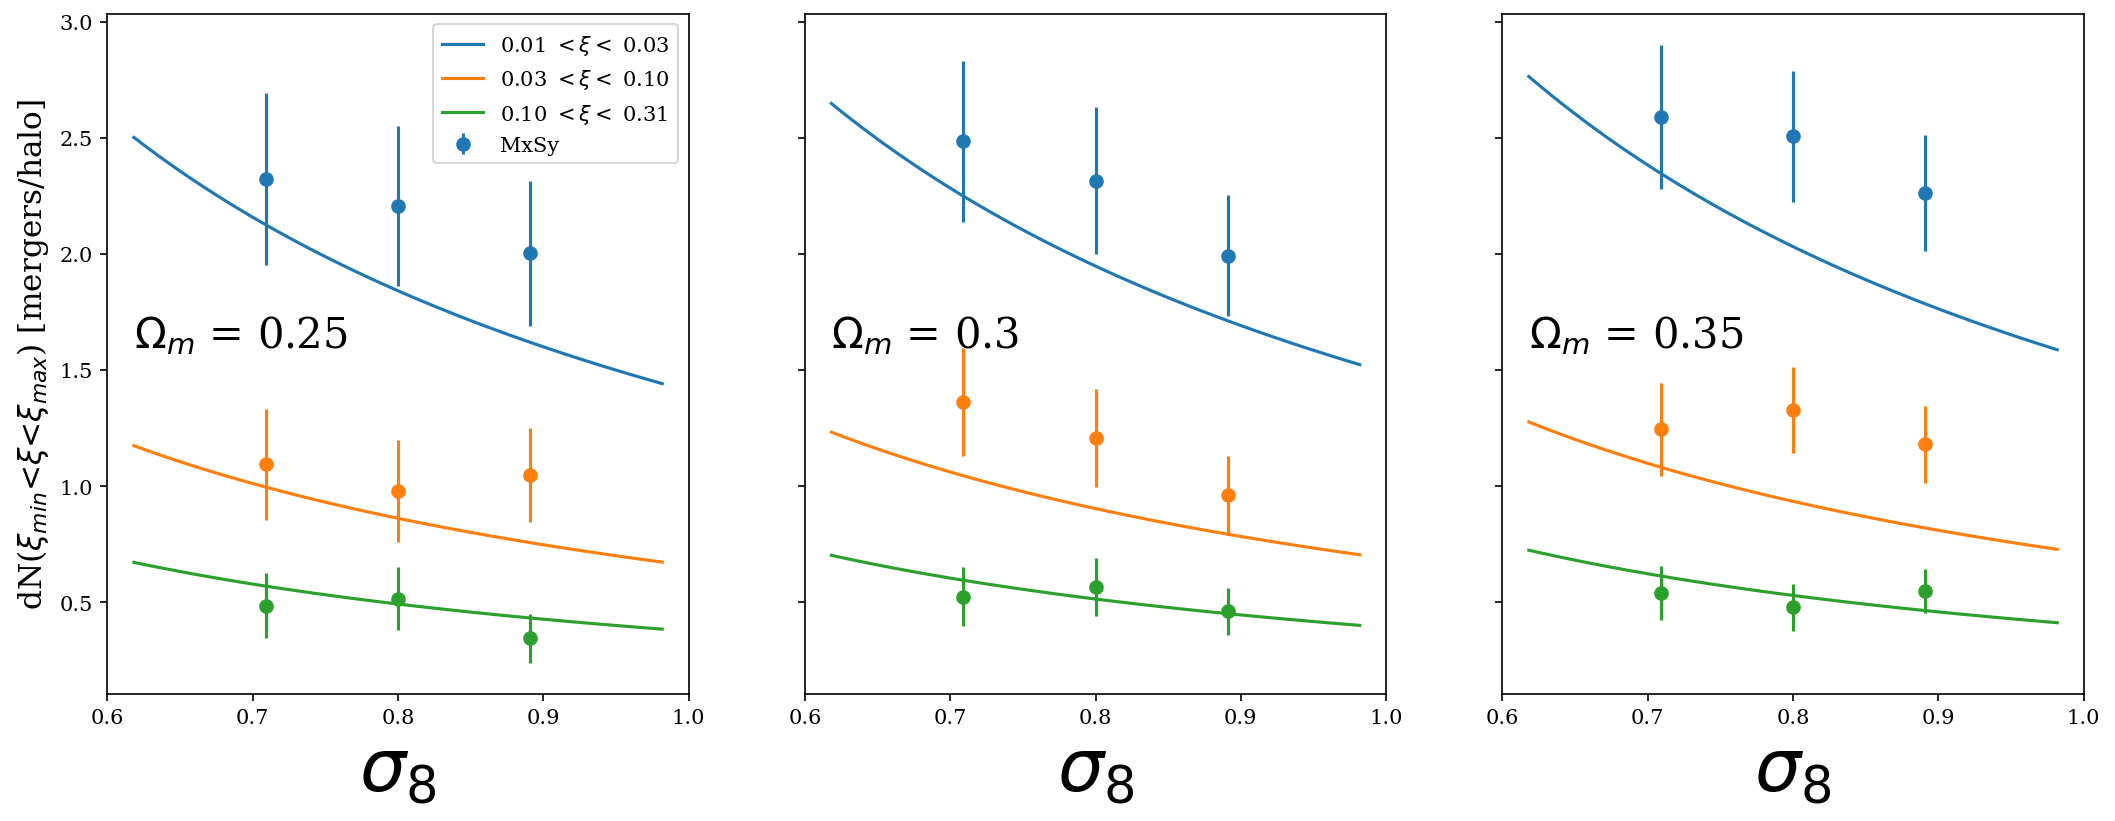

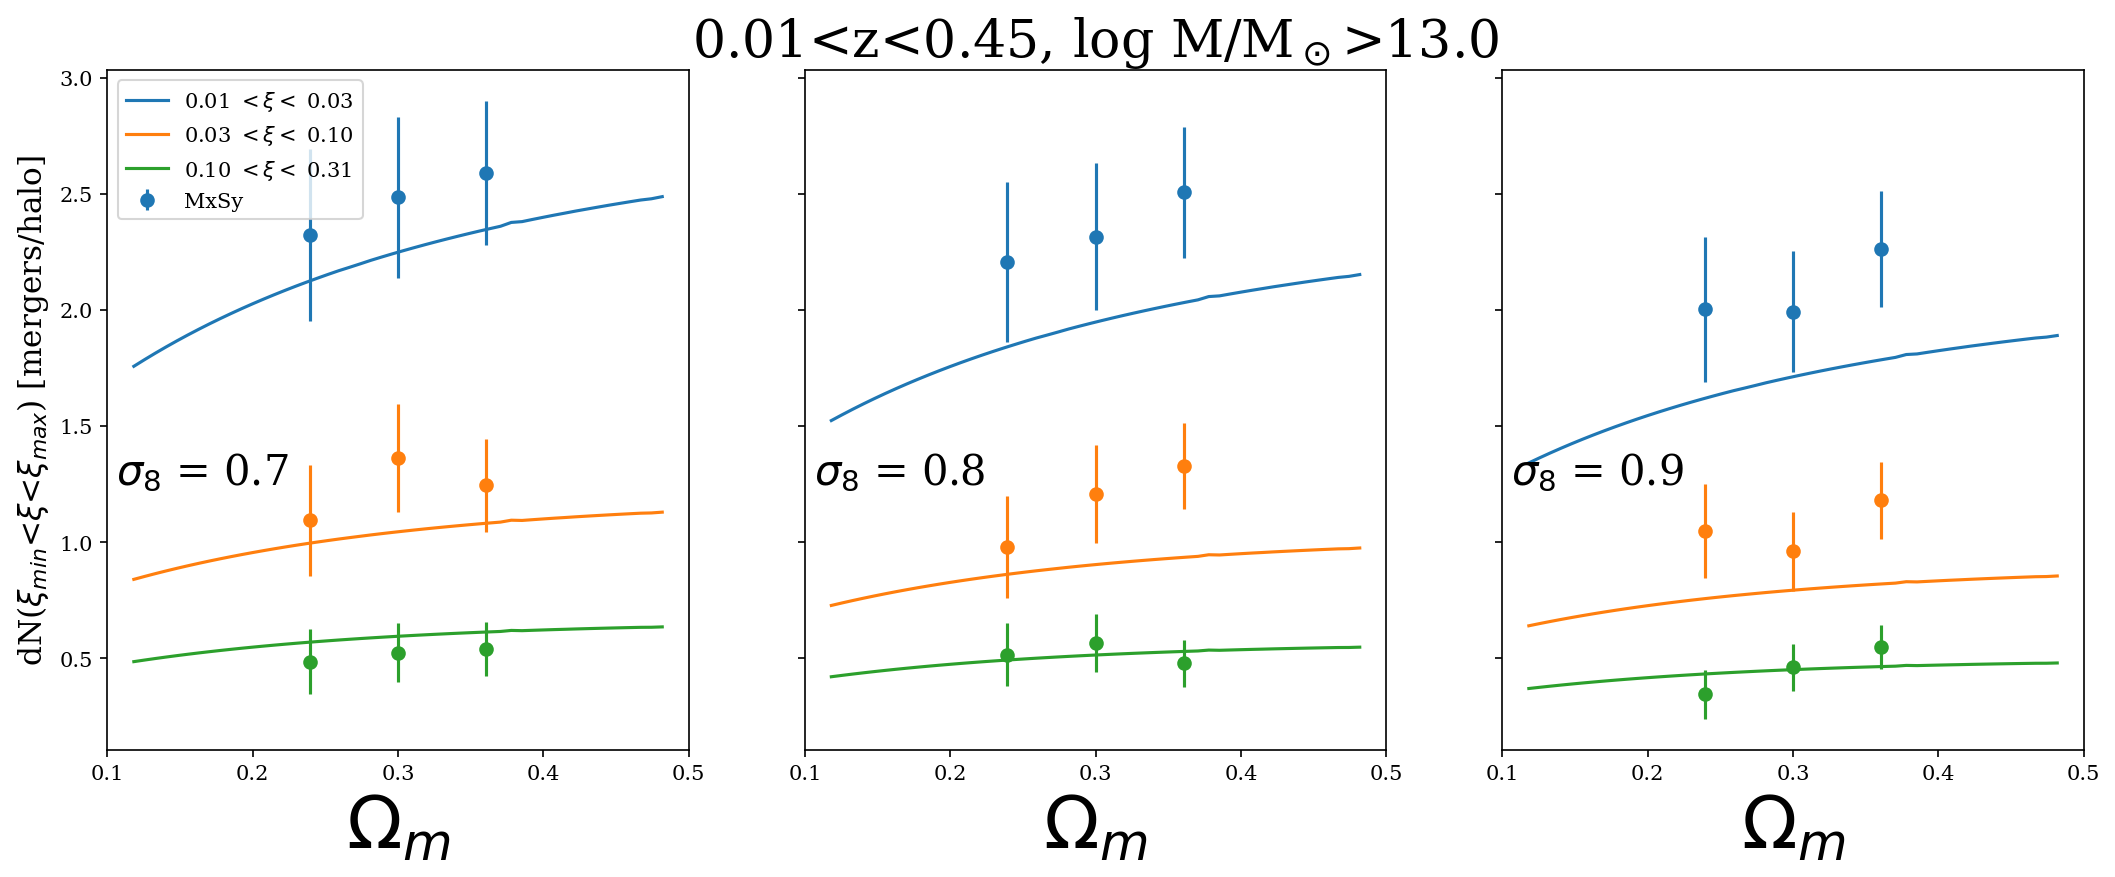

In [55]:
resol, ximin, ximax = 100, 1e-2, 1

log_fracs = [0, 0.25, 0.5]  # log space fraction between ximin and ximax
max_fracs = [0.25, 0.5, 0.75]
ximins = (resol * np.array(log_fracs)).astype(int)
ximaxs = (resol * np.array(max_fracs)).astype(int)
dexis = np.logspace(np.log10(ximin), np.log10(ximax), resol)

sim_selec1s = np.array([[0, 3, 6], [1,4,7], [2,5,8]])

sim_selec2s = np.array([[0, 1, 2], [3,4,5], [6,7,8]])

om1 = 0.3
om1s = [0.25,0.3,0.35]

zmin, zmax = 0.01, 0.45
c_params = ['\sigma_8', '\Omega_m']
save_sim=False

for c_param in c_params:
    sim_res, pois_res = np.zeros((len(sim_selec1s[0]), resol - 1)), np.zeros((len(sim_selec1s[0]), resol - 1))

    fig, axs = plt.subplots(1, 3, figsize=[17, 6], sharey=True)
    for p in range(3):
    #####--------------GETTING THE SIMULATION M RATES-----################         
        for i in range(len(sim_selec1s[0])):
            if c_param == '\Omega_m':
                sim_selec1 = sim_selec1s[p]
                sim = sim_names[sim_selec1[i]]
            elif om1 == 0.3:
                sim_selec2 = sim_selec2s[p]
                sim = sim_names[sim_selec2[i]] 
            else:
                sim = sim_names[sim_selec3[i]]
            sim1 = Simulation(sim, sims[sim][0], sims[sim][1], path)
            reds = sim1.get_redshifts()
            snap_min, snap_max = np.min(np.where(reds >= zmin)) + 1, np.min(np.where(reds >= zmax)) + 1
            snapshots = np.arange(snap_min, snap_max, 1)
            if sim1.name[0] == 'M':
                mlim = 5e13
            elif sim1.name[0] == 'I':
                mlim = 1e13
                mrate_path = illustris_path
            elif sim1.name[0] == 'm':
                mlim = 3e13
            else:
                mlim = 1e12

            if save_sim:
                mres, tnds = sim1.N_of_xi(snapshots, mlim, resol=resol, wpos=False)
                np.savetxt('./data/counts_{}.txt'.format(sim), mres)
                np.savetxt('./data/tot_halos_{}.txt'.format(sim), tnds)
            else: 
                mres = np.loadtxt('./data/counts_{}.txt'.format(sim))
                tnds = np.loadtxt('./data/tot_halos_{}.txt'.format(sim))
            dmres = (mres[:-1, :] - mres[1:, :]) / tnds[1:, :]
            ps = np.sqrt(mres[:-1, :] - mres[1:, :]) / tnds[1:, :]
            nmres = np.cumsum(dmres[::-1], axis=0)[::-1, :]
            nps = np.sqrt(np.cumsum(ps[::-1]**2, axis=0)[::-1, :])

            tot_integ = np.sum(nmres, axis=1)

            tot_ps = np.sum(nps, axis=1)
            sim_res[i, :] = tot_integ
            pois_res[i, :] = tot_ps


    ########### GETTING THE ANALYTICAL MERGER RATES --------##############
        save = False
        zresol, omresol = 100, 50
        nreds = np.linspace(zmin, zmax, zresol)
        dz = (zmax - zmin) / zresol
        if c_param == '\Omega_m':
            a_omegas = np.linspace(0.15, 0.45, omresol)
        else:
            a_sigmas = np.linspace(0.6, 1, omresol)
        amlim = 1e13
        for n in range(len(ximins)):
            i = ximins[n]
            l = ximaxs[n]
            xmax = dexis[l-1]
            if save:
                res = []
                for m in range(omresol):
                    diff_nmerg = np.zeros(zresol)
                    if c_param == '\Omega_m':
                        omg = a_omegas[m]
                        s8 = sim1.sig8
                    else:
                        s8 = a_sigmas[m]
                        omg = sim1.om0
                    for k in range(zresol):
                        diff_nmerg[k] = integ_mrate(3 * amlim, nreds[k], xi_min=dexis[i], xi_max=xmax, om0=omg, sig8=s8)
                    res.append(np.sum(diff_nmerg) * dz)
                if c_param == '\Omega_m':
                    np.savetxt('./data/anal_ntotmerg_zmin{}_zmax{:1.1f}_mlim{:2.1e}_ximin{:1.2f}'
                               '_ximax{:1.2f}_omegas_{}.txt'.format(zmin, zmax, amlim, dexis[i], xmax, s8), np.array(res))
                else:

                    np.savetxt('./data/anal_ntotmerg_zmin{}_zmax{:1.1f}_mlim{:2.1e}_ximin{:1.2f}'
                               '_ximax{:1.2f}_sigmas_{}.txt'.format(zmin, zmax, amlim, dexis[i], xmax, omg), np.array(res))

            else:
                if c_param == '\Omega_m':
                    s8 = sim1.sig8
                    res = np.loadtxt('./data/anal_ntotmerg_zmin{}_zmax{:1.1f}_mlim{:2.1e}_ximin{:1.2f}_'
                                     'ximax{:1.2f}_omegas_{}.txt'.format(zmin, zmax, amlim, dexis[i], xmax, s8))
                else:
                    omg = sim1.om0
                    res = np.loadtxt('./data/anal_ntotmerg_zmin{}_zmax{:1.1f}_mlim{:2.1e}_'
                                     'ximin{:1.2f}_ximax{:1.2f}_sigmas_{}.txt'.format(zmin, zmax, amlim, dexis[i], xmax, omg))
            if c_param == '\Omega_m':
                axs[p].plot(a_omegas, res, color='C{}'.format(n), label=r'{:1.2f} $<\xi<$ {:1.2f}'.format(dexis[i], xmax))
            else:
                axs[p].plot(a_sigmas, res, color='C{}'.format(n), label=r'{:1.2f} $<\xi<$ {:1.2f}'.format(dexis[i], xmax))
            if c_param == '\Omega_m':
                axs[p].errorbar(np.array(omegas)[sim_selec1[:3]], sim_res[:3, i] - sim_res[:3, l-2], pois_res[:3, i], fmt='o',
                            color='C{}'.format(n), label='MxSy'[:4 * (n == 0)])
            elif om1 == 0.3:
                axs[p].errorbar(np.array(sigmas)[sim_selec2[:3]], sim_res[:3, i] - sim_res[:3, l-2], pois_res[:3, i], fmt='o',
                            color='C{}'.format(n), label=r'MxSy'[:4 * (n == 0)])
            else:
                axs[p].errorbar(np.array(sigmas)[sim_selec2[:3]], sim_res[:3, i] - sim_res[:3, l-2], pois_res[:3, i], fmt='o',
                            color='C{}'.format(n), label='MxSy'[:4 * (n == 0)])
                axs[p].errorbar(np.array(sigmas)[sim_selec2[3]], sim_res[3, i] - sim_res[3, l-2], pois_res[3, i], fmt='v',
                            color='C{}'.format(n), label='New HR sim'[:10 * (n == 0)])

        if p==0:
            axs[p].set_ylabel(r'dN($\xi_{min}$<$\xi$<$\xi_{max}$) [mergers/halo]', size=15)
            axs[p].legend(fontsize=10)
        axs[p].set_xlabel(r'${}$'.format(c_param), size=35)
        if p==1 and c_param=='\Omega_m':
            axs[p].set_title(r'{}<z<{}, log M/M$_\odot$>{:2.1f}'.format(zmin, zmax, np.log10(amlim)), size=25)
        if c_param == '\sigma_8':
            axs[p].annotate(r'$\Omega_m$ = {}'.format(omg), (0.6, 1.6), size=20)
        else:
            axs[p].annotate(r'$\sigma_8$ = {}'.format(s8), (0.14, 1.25), size=20)
        axs[p].xaxis.set_major_locator(ticker.LinearLocator(numticks=5))
        axs[p].xaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f'))
    if c_param == '\sigma_8':
        plt.savefig(r'./figs/integ_N_tot_{}_{:2.0f}_m{:2.1f}.pdf'.format(c_param[1:], 100 * omg, np.log10(amlim)),
                dpi=650, bbox_inches='tight', facecolor='white',
                transparent=False)
        plt.savefig(r'./figs/integ_N_tot_{}_{:2.0f}_m{:2.1f}.png'.format(c_param[1:], 100 * omg, np.log10(amlim)),
                dpi=650, bbox_inches='tight', facecolor='white',
                transparent=False)
    else:
        plt.savefig(r'./figs/integ_N_tot_{}_{:2.0f}_s{:2.0f}.pdf'.format(c_param[1:], 100 * s8,  np.log10(amlim)),
                    dpi=650, bbox_inches='tight', facecolor='white', transparent=False)
        plt.savefig(r'./figs/integ_N_tot_{}_{:2.0f}_s{:2.0f}.png'.format(c_param[1:], 100 * s8,  np.log10(amlim)),
                    dpi=650, bbox_inches='tight', facecolor='white', transparent=False)
    # plt.show()